 This data set includes votes for each of the U.S. House of Representatives Congressmen on the 16 key votes identified by the CQA. The CQA lists nine different types of votes: voted for, paired for, and announced for (these three simplified to yea), voted against, paired against, and announced against (these three simplified to nay), voted present, voted present to avoid conflict of interest, and did not vote or otherwise make a position known (these three simplified to an unknown disposition).

Source: https://archive.ics.uci.edu/ml/datasets/congressional+voting+records

Task: Build a classifier that can predict the party of a congress member based on his decision. use the last 50 instances of the dataset as a test set


## Data preparation 


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv ("C:/Users/hp/Desktop/python RWTH/data/vote.csv", na_values="?")
data

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


In [3]:
data.shape

(435, 17)

In [4]:
data.columns


Index(['party', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-corporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [5]:
data.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


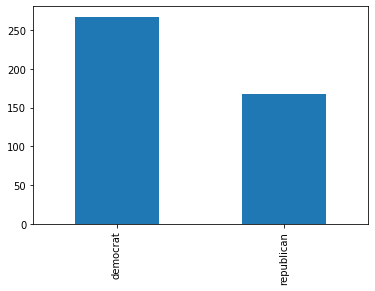

In [6]:
data.party.value_counts().plot(kind="bar")

### Dealing with missing values


In [7]:
# Number of missing values
data.iloc[:,1:].isnull().sum()
#I will try to work with missing values and see if it couses me a prob (update It couses some problems so I need to find a wayto fillna) 


handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
dtype: int64

In [8]:
#impute missing values
from sklearn.impute import SimpleImputer
from numpy import nan
from numpy import isnan
imputer = SimpleImputer(missing_values=nan, strategy='most_frequent')
for col in data.columns:
    data[col]= imputer.fit_transform(data[col].values.reshape(-1, 1))


In [9]:
data.iloc[:,1:].isnull().sum()


handicapped-infants                       0
water-project-cost-sharing                0
adoption-of-the-budget-resolution         0
physician-fee-freeze                      0
el-salvador-aid                           0
religious-groups-in-schools               0
anti-satellite-test-ban                   0
aid-to-nicaraguan-contras                 0
mx-missile                                0
immigration                               0
synfuels-corporation-cutback              0
education-spending                        0
superfund-right-to-sue                    0
crime                                     0
duty-free-exports                         0
export-administration-act-south-africa    0
dtype: int64

In [10]:
#prepare data for scikit-learning
labels=data['party']

features=data.iloc[:,1:]


In [11]:
#import sklearn preprocessing
from sklearn import preprocessing 

In [12]:
# transform the strings into integers
labels=preprocessing.LabelEncoder().fit_transform(labels) # 1 for republican and 0 for democrat
features=features.replace("y",1)
features=features.replace("n",0)


## Split data


In [13]:
features_test=features.iloc[-50:,:]
features_train=features.iloc[:385,:]
labels_test=labels[-50:]
labels_train=labels[:385]


## Predict with KNeighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(features_train,labels_train)
predicted_test=clf.predict(features_test)
#Acuracy
from sklearn.metrics import accuracy_score
print("the accuracy score is %.3f" %accuracy_score(labels_test,predicted_test) )

the accuracy score is 0.860


In [24]:
from sklearn.metrics import confusion_matrix

print("The confusion matrix is \n", confusion_matrix(labels_test,predicted_test))

The confusion matrix is 
 [[28  2]
 [ 5 15]]


## K-fold cross validation with KNeighbors

In [15]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(clf,features,labels,cv=10,scoring="accuracy")
print("Accuracy according to cross-validation: ", scores.mean())

Accuracy according to cross-validation:  0.9235955904560557


## Other classifiers

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [17]:
clf_names = ["k-Nearest Neighbors", 
             #"Linear SVM", 
             #"RBF SVM",
             "Decision Tree", 
             "Random Forest", 
             "Neural Net", 
             "Naive Bayes",
             "AdaBoost",
            "Logistic Regression"]
clfs = [KNeighborsClassifier(n_neighbors=10),
    #SVC(kernel="linear"),
    #SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    LogisticRegression()]

In [18]:
for name, clf in zip(clf_names, clfs):
    print (name)
    %time scores = cross_val_score(clf,features,labels,cv=10,scoring="accuracy")
    print ("Accuracy according to cross-validation: ", scores.mean(), "\n")

k-Nearest Neighbors
Wall time: 77 ms
Accuracy according to cross-validation:  0.9258683177287829 

Decision Tree
Wall time: 34 ms
Accuracy according to cross-validation:  0.9377227423739052 

Random Forest


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

Wall time: 145 ms
Accuracy according to cross-validation:  0.9583358501963154 

Neural Net


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Wall time: 4.38 s
Accuracy according to cross-validation:  0.9561159770462095 

Naive Bayes
Wall time: 44 ms
Accuracy according to cross-validation:  0.9236484445786772 

AdaBoost
Wall time: 776 ms
Accuracy according to cross-validation:  0.958388704318937 

Logistic Regression
Wall time: 55 ms
Accuracy according to cross-validation:  0.9560077519379846 



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  